# 1.Importing basic libraries

In [1]:
#Load data-preprocessing libraries :Data I/O, Cleaning/Preprocessing, Transformation, Statistical Analysis, Machine Learning Integration, Parallel Processing, Visualization, Data Storage/Retrieval.
import pandas as pd #Pandas, built on top of NumPy, specializes in data manipulation and analysis, offering high-level structures like DataFrames for efficient handling of structured data.
import numpy as np  #NumPy is a fundamental package for scientific computing in Python, providing support for large arrays and matrices

In [2]:
# text processing libraries : Text Tokenization (Breaking down text into smaller units), Text Cleaning and Preprocessing (Removing noise, handling punctuation, stemming, lemmatization), Part-of-Speech Tagging (Assigning grammatical categories to words), Named Entity Recognition (Identifying entities in text), Sentiment Analysis (Determining emotional tone), Text Similarity and Matching (Measuring similarity between texts), Topic Modeling (Identifying topics in documents), Text Vectorization (Converting text to numerical vectors), Regular Expressions (Pattern matching in text), Language Detection (Identifying language). 
import re #Python's built-in library for pattern matching and string manipulation, facilitating tasks like text extraction and substitution.
import nltk #Comprehensive NLP library providing tools for tokenization, part-of-speech tagging, named entity recognition, and sentiment analysis, along with datasets for research.
from nltk.corpus import stopwords # Part of NLTK, offering a list of common stop words for filtering non-significant terms during text processing in multiple languages.
# Stop words are words that are often filtered out during text processing because they are common and do not carry significant meaning (eg. in , to , if, etc.)
from nltk.stem import WordNetLemmatizer # NLTK tool specializing in lemmatization, reducing words to base forms using WordNet, beneficial for text normalization and analysis.
#Example After lemmatization words like multiplication, multiplicative will become multiple

In [3]:
#data-visualization libraries : Data visualization libraries are tools or frameworks that facilitate the creation of visual representations of data
import matplotlib.pyplot as plt #Provides a variety of basic plots (line, scatter, bar, histograms), customization options, subplot creation, and export capabilities.
import seaborn as sns #Offers a high-level interface, specialized functions for statistical plots, attractive color palettes, and efficient handling of categorical data

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')) 

lemmatizer = WordNetLemmatizer() 

pd.pandas.set_option('display.max_columns',None) #to show all columns without truncation when displaying DataFrames.

[nltk_data] Downloading package stopwords to C:\Users\amulya
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\amulya
[nltk_data]     shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#Load training data
df_data=pd.read_csv('./downloads/twitter_training.csv/twitter_training.csv',header=None)
df_data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
#rename the columns to get a better sense of data
df_data.rename(columns= {0:'Tweet_ID',1:'Topic',2:'Sentiment',3:'Tweet'},inplace=True)
df_data.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# 2. EDA

In [7]:
#shape of data
print('Train data shape: ',df_data.shape)

Train data shape:  (74682, 4)


In [8]:
df_data.isnull().sum()

Tweet_ID       0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

In [9]:
df_data.dropna(axis=0, inplace= True)

In [10]:
df_data.isnull().sum()

Tweet_ID     0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   73996 non-null  int64 
 1   Topic      73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [12]:
print('Distinct Item :');
col = ['Topic', 'Sentiment']
for i in col :
    print(i,'->')
    print(df_data[i].value_counts())
    print('\n')


Distinct Item :
Topic ->
Topic
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Bor

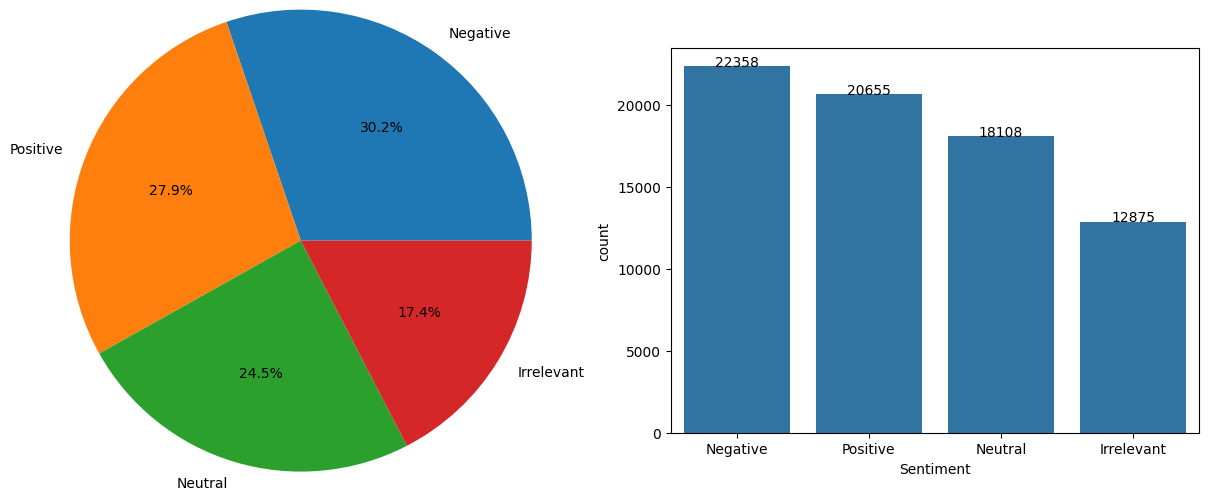

In [13]:
#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(15,5))

#plot pie chart
plt.subplot(1,2,1)  # 1st row, 2nd col, 1st plot
label = df_data['Sentiment'].value_counts().index
label_count = df_data['Sentiment'].value_counts().values
plt.pie(data=df_data, x=label_count, labels=label, autopct='%1.1f%%',  radius=1.5)

#plot countplot
plt.subplot(1,2,2)  # 1st row, 2nd col, 1st plot
ax = sns.countplot(x='Sentiment', data=df_data, order=label)
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [14]:
#Get the count of words in each tweet
df_data['Tweet_word_count']=df_data['Tweet'].apply(lambda x: len(x.split()))


<Axes: xlabel='Tweet_word_count', ylabel='Density'>

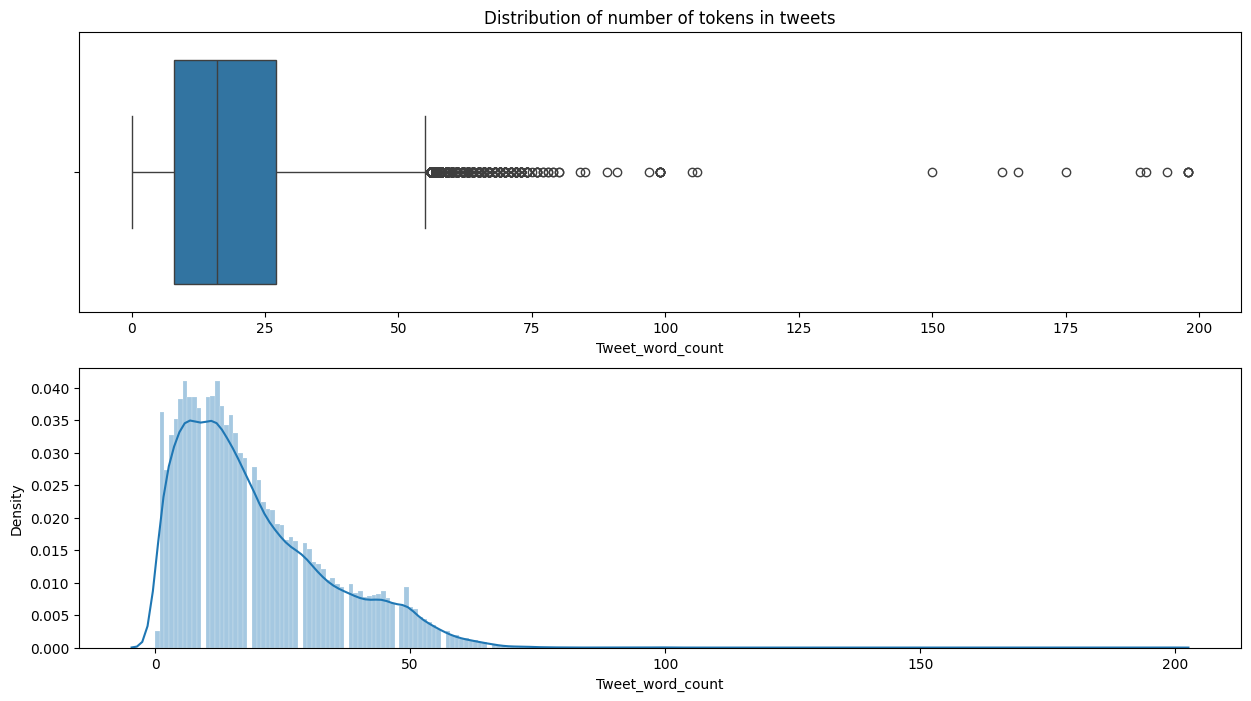

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x=df_data['Tweet_word_count'])
plt.title(('Distribution of number of tokens in tweets'))

plt.subplot(2,1,2)
sns.histplot(df_data['Tweet_word_count'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

In [16]:
#Extreme outliers
extreme_outliers = df_data['Tweet'][df_data['Tweet_word_count']>125]

for i in extreme_outliers.index :
    print(i , "Text Sentiment :" , df_data['Sentiment'][i])
    print(extreme_outliers[i])
    print('\n')

1826 Text Sentiment : Neutral
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


8546 Text Sentiment : Positive
I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEE E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E


10454 Text Sentiment : Positive
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [17]:
#Get count of characters in each tweet excluding the whitespaces
df_data['Tweet_char_count']=df_data['Tweet'].apply(lambda x: len(x)-x.count(' '))

<Axes: xlabel='Tweet_char_count', ylabel='Density'>

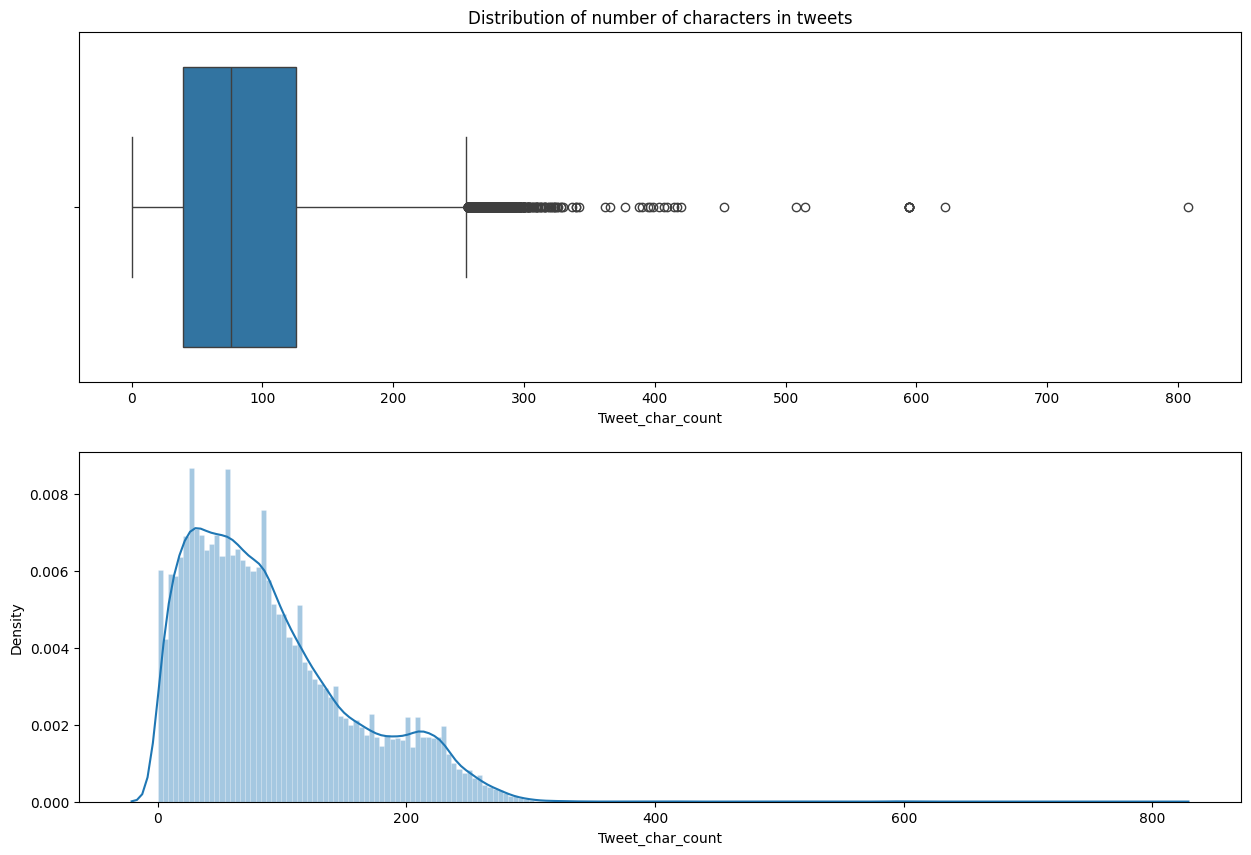

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=df_data['Tweet_char_count'])
plt.title(('Distribution of number of characters in tweets'))
plt.subplot(2,1,2)
sns.histplot(df_data['Tweet_char_count'],kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4))

# 3.Data Processing

In [19]:
#Remove user mentions from the tweets
#'I want to join @google' will become 'I want to join'
df_data['Tweet_clean']=df_data['Tweet'].apply(lambda x : re.sub(r'@[a-zA-Z0-9+]+','',x))

In [20]:
#Remove hashtags from the tweets
#'My new house #goals' will become 'My new house goals'
df_data['Tweet_clean'] = df_data['Tweet'].apply(lambda x : re.sub('#','',x))

In [21]:
# make a dictionary of contractions
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [22]:
#Remove contractions
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in x.split()]))

In [23]:
#Remove links/urls from the tweets
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: re.sub(r'http\S+','',x)) #\S+ matches one or more non-whitespace characters

In [24]:
def txt_conversion(sentence):
    #Getting only the letters from the tweets
    sentence=re.sub(r'[^a-zA-Z ]','',sentence)
    #Converting them to lowercase
    sentence=sentence.lower()
    #split based on space to remove multiple spaces
    words=sentence.split()
    #combining to form sentence
    return (" ".join(words)).strip()

In [25]:
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: txt_conversion(x))

In [26]:
#Removing stop-words and cpnverting words to lemma
#Stop words are the most commonly used words in a language (such as “the”, “a”, “an”, “in”)
#Example After lemmatization words like multiplication, multiplicative will become multiple
def stop_wrds_lemma_convert(sentence):
    tokens = [w for w in sentence.split() if not w in stop_words ]  #remove stop_words
    newString = ''
    for i in tokens:
        newString = newString+lemmatizer.lemmatize(i)+' '    #converting words to lemma 
    return newString.strip()  

In [27]:
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: stop_wrds_lemma_convert(x))

In [28]:
df_data.isnull().sum()

Tweet_ID            0
Topic               0
Sentiment           0
Tweet               0
Tweet_word_count    0
Tweet_char_count    0
Tweet_clean         0
dtype: int64

In [29]:
#earlier we had noticed that there are few tweets with just symbols. They must have got converted to whitespaces now
df_data.dropna(inplace=True)

In [31]:
#one-hot Topic feature
oh_topic=pd.get_dummies(df_data['Topic'],drop_first=True)

df_data=pd.concat([df_data,oh_topic],axis=1)
df_data.head()

,Tweet_ID,Topic,Sentiment,Tweet,Tweet_word_count,Tweet_char_count,Tweet_clean,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,CallOfDuty,CallOfDutyBlackopsColdWar,Cyberpunk2077,Dota2,FIFA,Facebook,Fortnite,Google,GrandTheftAuto(GTA),Hearthstone,HomeDepot,LeagueOfLegends,MaddenNFL,Microsoft,NBA2K,Nvidia,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11,43,im getting borderland murder,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,40,coming border kill,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,41,im getting borderland kill,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,42,im coming borderland murder,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,46,im getting borderland murder,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
#drop columns that are not required
df_data.drop(['Tweet_ID','Tweet','Topic'],axis=1,inplace=True)

# Save the cleaned dataset

In [33]:
df_data.to_csv('Twitter_cleaned.csv')